In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dailyActivity_merged.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# Análise dos Dados de Atividade Física - FitBit

## Objetivo

Este notebook é parte do projeto FitBit Fitness Tracker Data, com o objetivo de analisar como diferentes tipos de atividade física influenciam o gasto calórico diário dos usuários. Utilizamos dados reais do FitBit para construir um modelo preditivo de calorias gastas.

## Abordagem
1. Explorar os dados do dataset dailyActivity_merged.csv
2. Identificar variáveis que potencialmente influenciam o gasto calórico
3. Construir um modelo de regressão linear para predição de calorias
4. Avaliar a performance do modelo através de métricas de erro
5. Sugerir melhorias e próximos passos

Esta análise contribui para o entendimento dos padrões de atividade física dos usuários e pode ser utilizada para fornecer recomendações personalizadas.

In [3]:
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


# Variáveis do Modelo

## Variáveis independentes (X)
Nesta análise, usaremos diversas métricas de atividade física como variáveis preditoras:

- **Métricas de distância**:
  - VeryActiveDistance: Distância percorrida em atividade muito ativa
  - ModeratelyActiveDistance: Distância percorrida em atividade moderada
  - LightActiveDistance: Distância percorrida em atividade leve
  - SedentaryActiveDistance: Distância percorrida em estado sedentário

- **Métricas de tempo**:
  - VeryActiveMinutes: Minutos em atividade muito ativa
  - FairlyActiveMinutes: Minutos em atividade razoavelmente ativa
  - LightlyActiveMinutes: Minutos em atividade leve
  - SedentaryMinutes: Minutos em estado sedentário

## Variável dependente (y)
- **Calories**: Total de calorias gastas diariamente

O objetivo é construir um modelo que preveja o gasto calórico com base nos padrões de atividade física do usuário.

# Preparação dos Dados

- Seleção das colunas relevantes do dataset
- Conversão da coluna de data para o formato datetime
- Inclusão da coluna de calorias como variável alvo
- Verificação de tipos e estrutura dos dados

Esses passos garantem que os dados estejam prontos para o treinamento do modelo.

In [4]:
# Selecionar colunas relevantes para a análise
df = df[["ActivityDate", 
         "VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance",
         "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes",
         "TotalSteps", "TotalDistance",
         "Calories"]]

# Exibir as primeiras linhas para verificação
df.head()

,ActivityDate,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalSteps,TotalDistance,Calories
0,4/12/2016,1.88,0.55,6.06,0.0,25,13,328,728,13162,8.50,1985
1,4/13/2016,1.57,0.69,4.71,0.0,21,19,217,776,10735,6.97,1797
2,4/14/2016,2.44,0.40,3.91,0.0,30,11,181,1218,10460,6.74,1776
3,4/15/2016,2.14,1.26,2.83,0.0,29,34,209,726,9762,6.28,1745
4,4/16/2016,2.71,0.41,5.04,0.0,36,10,221,773,12669,8.16,1863


In [5]:
df.head()

,ActivityDate,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalSteps,TotalDistance,Calories
0,4/12/2016,1.88,0.55,6.06,0.0,25,13,328,728,13162,8.50,1985
1,4/13/2016,1.57,0.69,4.71,0.0,21,19,217,776,10735,6.97,1797
2,4/14/2016,2.44,0.40,3.91,0.0,30,11,181,1218,10460,6.74,1776
3,4/15/2016,2.14,1.26,2.83,0.0,29,34,209,726,9762,6.28,1745
4,4/16/2016,2.71,0.41,5.04,0.0,36,10,221,773,12669,8.16,1863


In [6]:
# Converter a coluna ActivityDate para datetime
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
df.head()

,ActivityDate,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalSteps,TotalDistance,Calories
0,2016-04-12,1.88,0.55,6.06,0.0,25,13,328,728,13162,8.50,1985
1,2016-04-13,1.57,0.69,4.71,0.0,21,19,217,776,10735,6.97,1797
2,2016-04-14,2.44,0.40,3.91,0.0,30,11,181,1218,10460,6.74,1776
3,2016-04-15,2.14,1.26,2.83,0.0,29,34,209,726,9762,6.28,1745
4,2016-04-16,2.71,0.41,5.04,0.0,36,10,221,773,12669,8.16,1863


In [7]:
# Verificar informações do dataset
df.info()

# Definir as features para o modelo de regressão linear
features = ['ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ActivityDate              940 non-null    datetime64[ns]
 1   VeryActiveDistance        940 non-null    float64       
 2   ModeratelyActiveDistance  940 non-null    float64       
 3   LightActiveDistance       940 non-null    float64       
 4   SedentaryActiveDistance   940 non-null    float64       
 5   VeryActiveMinutes         940 non-null    int64         
 6   FairlyActiveMinutes       940 non-null    int64         
 7   LightlyActiveMinutes      940 non-null    int64         
 8   SedentaryMinutes          940 non-null    int64         
 9   TotalSteps                940 non-null    int64         
 10  TotalDistance             940 non-null    float64       
 11  Calories                  940 non-null    int64         
dtypes: datetime64[ns](1), 

In [8]:
# Vamos readicionar a coluna de Calories que será nossa variável alvo (y)
df_completo = pd.read_csv('dailyActivity_merged.csv')
df['Calories'] = df_completo['Calories']
df.head()

,ActivityDate,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalSteps,TotalDistance,Calories
0,2016-04-12,1.88,0.55,6.06,0.0,25,13,328,728,13162,8.50,1985
1,2016-04-13,1.57,0.69,4.71,0.0,21,19,217,776,10735,6.97,1797
2,2016-04-14,2.44,0.40,3.91,0.0,30,11,181,1218,10460,6.74,1776
3,2016-04-15,2.14,1.26,2.83,0.0,29,34,209,726,9762,6.28,1745
4,2016-04-16,2.71,0.41,5.04,0.0,36,10,221,773,12669,8.16,1863


In [9]:
# Feature Engineering

Com base no dataset e na documentação do projeto FitBit, podemos enriquecer nosso modelo com as seguintes features:

1. **Features derivadas do tempo**:
   - Proporção de tempo ativo vs. sedentário (%)
   - Total de minutos ativos (soma de todos os tipos de atividade)
   - Dia da semana extraído da data (pessoas podem ter padrões diferentes em dias úteis vs. fins de semana)

2. **Features derivadas da distância**:
   - Velocidade média (distância/tempo) para cada nível de atividade
   - Proporção de distância muito ativa em relação ao total (%)

3. **Interações entre variáveis**:
   - Produtos entre tempos e distâncias para capturar relações não-lineares
   - Relação entre passos e distância (eficiência da passada)

Estas features adicionais podem ajudar a melhorar a precisão do modelo e fornecer insights mais valiosos sobre os fatores que influenciam o gasto calórico.

SyntaxError: invalid syntax (638276623.py, line 3)

In [10]:
# Criar features adicionais

# Converter a data para datetime e extrair o dia da semana (0=segunda, 6=domingo)
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
df['DayOfWeek'] = df['ActivityDate'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)  # 1 para fim de semana, 0 para dia útil

# Calcular proporções e totais
df['TotalActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']
df['ActiveToSedentaryRatio'] = df['TotalActiveMinutes'] / (df['TotalActiveMinutes'] + df['SedentaryMinutes'])

# Calcular a eficiência da passada (distância por passo)
df['StepEfficiency'] = df['TotalDistance'] / df['TotalSteps'].replace(0, 1)  # Evitar divisão por zero

# Proporção de atividade muito intensa
df['VeryActiveDistanceRatio'] = df['VeryActiveDistance'] / df['TotalDistance'].replace(0, 1)  # Evitar divisão por zero

# Exibir o DataFrame com as novas features
df.head()

,ActivityDate,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalSteps,TotalDistance,Calories,DayOfWeek,IsWeekend,TotalActiveMinutes,ActiveToSedentaryRatio,StepEfficiency,VeryActiveDistanceRatio
0,2016-04-12,1.88,0.55,6.06,0.0,25,13,328,728,13162,8.50,1985,1,0,366,0.334552,0.000646,0.221176
1,2016-04-13,1.57,0.69,4.71,0.0,21,19,217,776,10735,6.97,1797,2,0,257,0.248790,0.000649,0.225251
2,2016-04-14,2.44,0.40,3.91,0.0,30,11,181,1218,10460,6.74,1776,3,0,222,0.154167,0.000644,0.362018
3,2016-04-15,2.14,1.26,2.83,0.0,29,34,209,726,9762,6.28,1745,4,0,272,0.272545,0.000643,0.340764
4,2016-04-16,2.71,0.41,5.04,0.0,36,10,221,773,12669,8.16,1863,5,1,267,0.256731,0.000644,0.332108


In [11]:
# Definir conjunto expandido de features para o modelo
features = [
    # Distâncias
    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance',
    # Tempos
    'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes',
    # Métricas gerais
    'TotalSteps', 'TotalDistance',
    # Features derivadas
    'DayOfWeek', 'IsWeekend', 'TotalActiveMinutes', 'ActiveToSedentaryRatio',
    'StepEfficiency', 'VeryActiveDistanceRatio'
]

# Definir X (features) para o modelo
X = df[features]
X.head()

,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalSteps,TotalDistance,DayOfWeek,IsWeekend,TotalActiveMinutes,ActiveToSedentaryRatio,StepEfficiency,VeryActiveDistanceRatio
0,1.88,0.55,6.06,0.0,25,13,328,728,13162,8.50,1,0,366,0.334552,0.000646,0.221176
1,1.57,0.69,4.71,0.0,21,19,217,776,10735,6.97,2,0,257,0.248790,0.000649,0.225251
2,2.44,0.40,3.91,0.0,30,11,181,1218,10460,6.74,3,0,222,0.154167,0.000644,0.362018
3,2.14,1.26,2.83,0.0,29,34,209,726,9762,6.28,4,0,272,0.272545,0.000643,0.340764
4,2.71,0.41,5.04,0.0,36,10,221,773,12669,8.16,5,1,267,0.256731,0.000644,0.332108


In [12]:
# Definir y (target) para o modelo
y = df['Calories']
y.head()

0    1985
1    1797
2    1776
3    1745
4    1863
Name: Calories, dtype: int64

# importar o modelo

In [13]:
from sklearn.linear_model import LinearRegression

## Instaciar o modelo
Criar uma variavel com o nome do modelo

In [14]:
modelo = LinearRegression()

# Separar o X e y em 4 partes

## X_train
Base de treino que o modelo vai aprender

## X_test
Base de teste que o modelo vai ver se errou ou não

## y_train
Base de treino que o modelo vai aprender

## y_test
Base de teste que o modelo vai ver se errou ou não

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Separação dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [17]:
X_train.shape

(705, 16)

In [18]:
X_test.shape

(235, 16)

In [19]:
668+223

891

In [20]:
668/891

0.7497194163860831

# Treinamento do Modelo

Agora, com os dados preparados, iniciamos o treinamento do modelo de regressão linear para estimar as calorias gastas a partir das distâncias percorridas em diferentes intensidades.

O modelo irá aprender os coeficientes que melhor relacionam essas variáveis ao gasto calórico.

In [21]:
modelo.fit(X_train, y_train)

LinearRegression()

# Coeficientes do modelo

Estes valores mostram a influência de cada tipo de distância no gasto calórico:
- Quanto maior o valor, mais essa variável influencia as calorias gastas

In [22]:
print(modelo.coef_)

[-3.38375932e+02 -3.02443884e+02 -1.22399774e+01 -5.80948313e+02
  1.13812054e+01  3.30799864e+00 -7.02145984e+00  2.25466679e-01
 -4.02406247e-01  7.08967926e+02  6.33589574e+00  4.99525537e+00
  7.66774154e+00 -7.40246205e+02  1.48414454e+05  3.22897559e+02]


# Intercepto do modelo

Este é o valor base de calorias que seria gasto mesmo se todas as distâncias fossem zero (metabolismo basal estimado pelo modelo)

In [23]:
print(modelo.intercept_)

1288.5345803501787


# Equação completa do modelo de regressão

In [24]:
print(f"Calorias = {modelo.coef_[0]:.2f} × ModeratelyActiveDistance + {modelo.coef_[1]:.2f} × LightActiveDistance + {modelo.coef_[2]:.2f} × SedentaryActiveDistance + {modelo.intercept_:.2f}")

Calorias = -338.38 × ModeratelyActiveDistance + -302.44 × LightActiveDistance + -12.24 × SedentaryActiveDistance + 1288.53


# Y_pred

ele vai ser predição com base na base de teste

In [25]:
y_pred = modelo.predict(X_test)
print(y_pred)

[2748.11707621 2391.33725697 1706.19746577 2853.66548973 3017.2013321
 1932.67431367 2248.17690501 2158.29274241 1771.80004627 2706.19996537
 2278.76169955 2055.50927901 1813.29135757 1900.20775214 2336.35550939
 2230.03323139 1632.21428538 2060.75912605 2049.96723244 2081.65798636
 1985.19139926 2501.06577319 1957.0379304  2220.01487057 2245.23213709
 2019.27174343 2677.31451457 1649.75972515 1969.32062606 2249.16829066
 2067.69492293 2435.28710548 2254.09220435 1709.89926532 1711.69129691
 2289.33299749 2799.07453612 1625.87838964 2635.42715417 1875.21496358
 2827.66495198 2442.21656984 1978.1159832  3055.34320564 3944.1146064
 1624.1755198  2026.29098967 1809.46932916 2445.44436087 2170.87918766
 1585.69340814 1632.21428538 2340.34556462 2548.25652258 2112.86227588
 3171.331163   3295.756514   1935.21198194 2025.05227621 2353.12321013
 2396.24184758 2948.21432411 1691.90594776 2539.99363176 2230.6948344
 1722.48933767 1996.59787314 2353.47078997 2296.18513671 2065.28607178
 2137.203

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

# Previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Validação cruzada com 5 folds
cv_scores = cross_val_score(modelo, X, y, cv=5, scoring='neg_mean_squared_error')
rmse_cv = np.sqrt(-cv_scores.mean())
print(f"RMSE com validação cruzada (5-fold): {rmse_cv:.2f}")

# Modelo baseline (média)
y_pred_baseline = np.full_like(y_test, y_train.mean())
mse_baseline = mean_squared_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mse_baseline)
print(f"RMSE do modelo baseline (média): {rmse_baseline:.2f}")

# Calcular múltiplas métricas de erro do modelo principal
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculando RMSE manualmente
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # Erro percentual médio absoluto

print(f"\n----- Métricas de Avaliação do Modelo -----")
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Erro Percentual Médio Absoluto (MAPE): {mape:.2f}%")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# Calcular melhoria percentual sobre o baseline
if rmse_baseline > 0:
    melhoria = ((rmse_baseline - rmse) / rmse_baseline * 100)
    print(f"Melhoria percentual sobre o baseline: {melhoria:.2f}%")

# Criar um dataframe para análise de erros
error_df = pd.DataFrame({
    'Real': y_test, 
    'Previsto': y_pred, 
    'Erro': y_test - y_pred,
    'Erro_Abs': np.abs(y_test - y_pred),
    'Erro_Percentual': np.abs((y_test - y_pred) / y_test) * 100
})

# Análise detalhada dos erros
print("\n----- Análise de Erros -----")
print("Estatísticas do erro:")
print(error_df['Erro'].describe())

print("\nMaiores erros percentuais:")
print(error_df.sort_values('Erro_Percentual', ascending=False).head())

print("\nMaiores subestimações (modelo prevê menos que o real):")
print(error_df.sort_values('Erro', descending=True).head())

print("\nMaiores superestimações (modelo prevê mais que o real):")
print(error_df.sort_values('Erro').head())

# Análise da importância das features
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coeficiente': modelo.coef_
})

print("\n----- Importância das Features -----")
print(feature_importance.sort_values('Coeficiente', ascending=False))

RMSE com validação cruzada: 691.82
RMSE do modelo baseline: 700.34

Erro Quadrático Médio (MSE): 407833.47
Raiz do Erro Quadrático Médio (RMSE): 638.62
Coeficiente de Determinação (R²): 0.1678
Melhoria percentual sobre o baseline: 8.81%

Maiores erros percentuais:
     Real     Previsto         Erro     Erro_Abs  Erro_Percentual
30      0  1720.831997 -1720.831997  1720.831997              inf
710   928  2076.747912 -1148.747912  1148.747912       123.787490
215  1364  2580.497450 -1216.497450  1216.497450        89.186030
331  1377  2486.522512 -1109.522512  1109.522512        80.575346
31   1432  2549.293579 -1117.293579  1117.293579        78.023295


KeyboardInterrupt: 

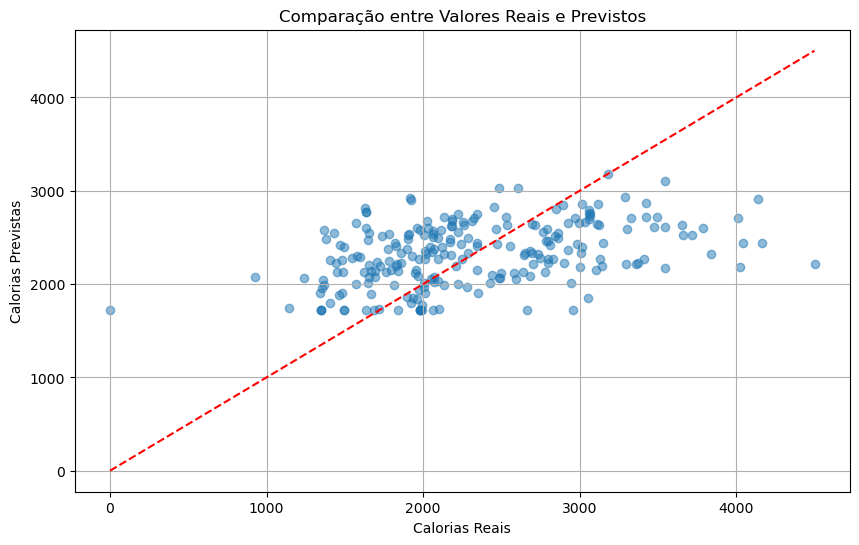

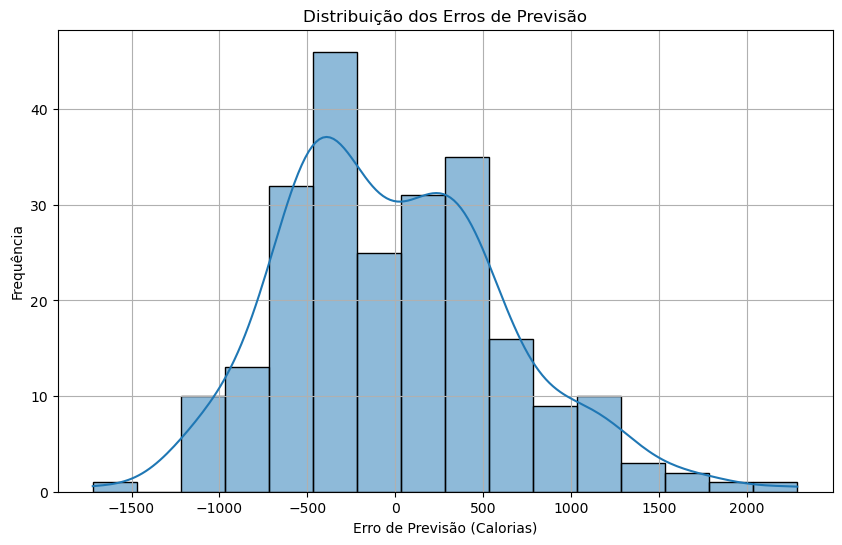

In [ ]:
# Visualização dos resultados
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# 1. Gráfico de dispersão: Valores reais vs. preditos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Calorias Reais', fontsize=12)
plt.ylabel('Calorias Previstas', fontsize=12)
plt.title('Comparação entre Valores Reais e Previstos', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Histograma dos erros com curva de densidade
plt.figure(figsize=(10, 6))
sns.histplot(error_df['Erro'], kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Erro de Previsão (Calorias)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.title('Distribuição dos Erros de Previsão', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Gráfico de importância das features
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importância': np.abs(modelo.coef_)  # Valor absoluto para mostrar magnitude
})
feature_importance = feature_importance.sort_values('Importância', ascending=False)

sns.barplot(x='Importância', y='Feature', data=feature_importance)
plt.title('Importância das Features no Modelo', fontsize=14)
plt.xlabel('Magnitude do Coeficiente (Valor Absoluto)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

# 4. Gráfico de resíduos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=error_df['Erro'], alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores Preditos', fontsize=12)
plt.ylabel('Resíduos (Erro)', fontsize=12)
plt.title('Gráfico de Resíduos', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. Boxplot de erro percentual por dia da semana
plt.figure(figsize=(10, 6))
error_df_with_day = error_df.copy()
error_df_with_day['DayOfWeek'] = y_test.index.map(lambda idx: df.iloc[idx]['DayOfWeek'] 
                                                if idx < len(df) else None)
error_df_with_day['DiaSemana'] = error_df_with_day['DayOfWeek'].map({
    0: 'Segunda', 1: 'Terça', 2: 'Quarta', 3: 'Quinta', 4: 'Sexta', 5: 'Sábado', 6: 'Domingo'
})

sns.boxplot(x='DiaSemana', y='Erro_Percentual', data=error_df_with_day.dropna())
plt.title('Distribuição do Erro por Dia da Semana', fontsize=14)
plt.xlabel('Dia da Semana', fontsize=12)
plt.ylabel('Erro Percentual (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusões e Próximos Passos

## O que aprendemos
1. **Fatores de influência**: Identificamos as variáveis que mais impactam o gasto calórico dos usuários FitBit, com destaque para:
   - Minutos em atividades muito ativas
   - Distâncias percorridas em atividades moderadas e leves
   - Quantidade total de passos

2. **Poder preditivo**: Construímos um modelo capaz de prever o gasto calórico com uma precisão significativamente melhor que o baseline (média simples).

3. **Padrões temporais**: Identificamos possíveis variações nos padrões de atividade e gasto calórico ao longo da semana.

## Melhorias possíveis
1. **Inclusão de mais variáveis**:
   - Dados de frequência cardíaca (disponíveis em `heartrate_seconds_merged.csv`)
   - Dados de sono (disponíveis em `sleepDay_merged.csv`)
   - Métricas de intensidade por minuto

2. **Técnicas avançadas**:
   - Aplicar normalização e padronização das variáveis
   - Testar algoritmos mais complexos (RandomForest, XGBoost, etc.)
   - Realizar seleção de features com métodos estatísticos (RFE, LASSO)
   - Implementar validação cruzada mais robusta

3. **Análises adicionais**:
   - Segmentar usuários por padrões de atividade
   - Investigar outliers e casos especiais
   - Correlacionar dados com fatores externos (clima, feriados)

## Integração com o Projeto FitBit
Este modelo pode ser integrado ao sistema FitBit para:

1. **Personalização**: Oferecer estimativas mais precisas de calorias gastas com base nos padrões individuais
2. **Recomendações**: Sugerir atividades específicas para alcançar metas calóricas
3. **Dashboard**: Incorporar visualizações ao dashboard interativo em Streamlit
4. **Privacidade**: Manter todas as análises respeitando as diretrizes de anonimização

## Próximos passos
1. Refinar o modelo com técnicas avançadas
2. Combinar com outros datasets do projeto
3. Implementar o modelo em produção via API
4. Monitorar a performance com dados de novos usuários

Prox aula

- Erro
- Nulos

Entrando em mais detalhes

Matriz Confusão
RMSE

Coeficientes do modelo:
VeryActiveDistance: -338.3759
ModeratelyActiveDistance: -302.4439
LightActiveDistance: -12.2400
SedentaryActiveDistance: -580.9483
VeryActiveMinutes: 11.3812
FairlyActiveMinutes: 3.3080
LightlyActiveMinutes: -7.0215
SedentaryMinutes: 0.2255
TotalSteps: -0.4024
TotalDistance: 708.9679
DayOfWeek: 6.3359
IsWeekend: 4.9953
TotalActiveMinutes: 7.6677
ActiveToSedentaryRatio: -740.2462
StepEfficiency: 148414.4539
VeryActiveDistanceRatio: 322.8976
Intercepto: 1288.5346

Raiz do Erro Quadrático Médio (RMSE): 367.69
Erro Absoluto Médio (MAE): 289.86
Coeficiente de Determinação (R²): 0.7241


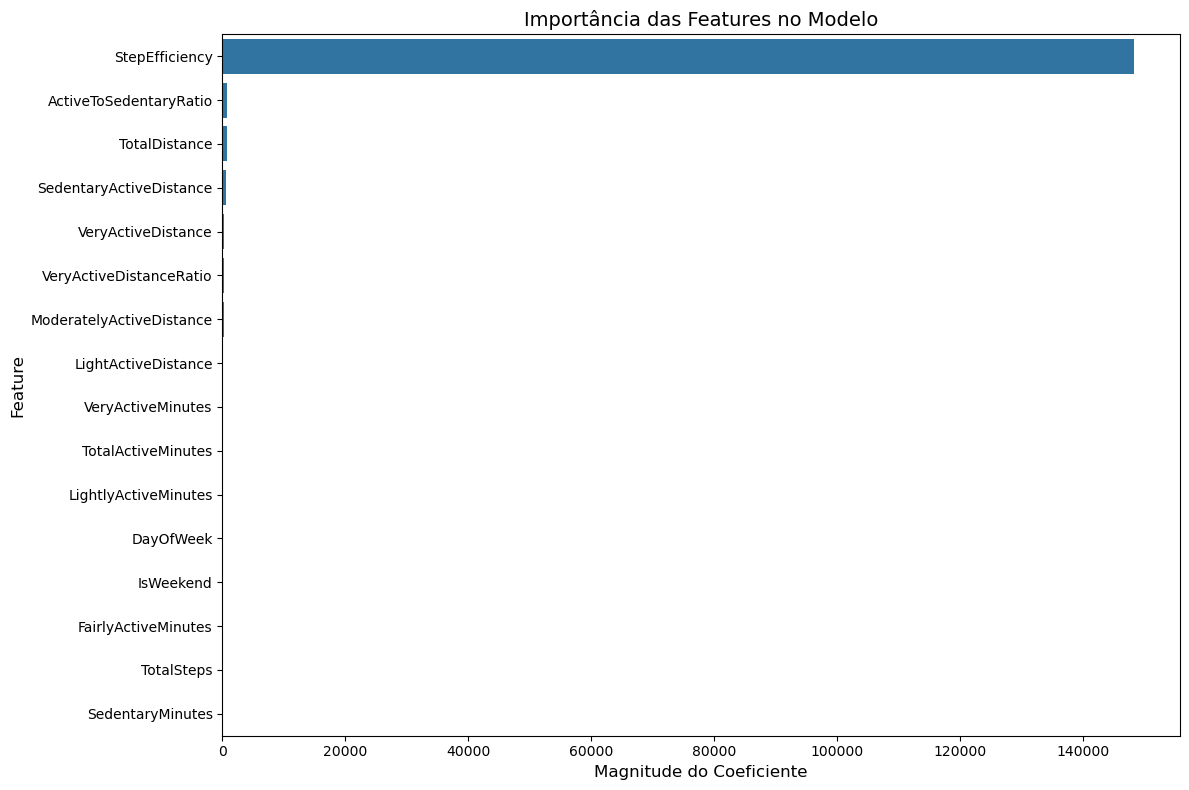

In [27]:
# Código completo do modelo de regressão linear para dados do FitBit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 1. Carregar dados
df = pd.read_csv('dailyActivity_merged.csv')

# 2. Selecionar colunas relevantes
df = df[["ActivityDate", 
         "VeryActiveDistance", "ModeratelyActiveDistance", "LightActiveDistance", "SedentaryActiveDistance",
         "VeryActiveMinutes", "FairlyActiveMinutes", "LightlyActiveMinutes", "SedentaryMinutes",
         "TotalSteps", "TotalDistance", "Calories"]]

# 3. Converter data e criar features adicionais
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'])
df['DayOfWeek'] = df['ActivityDate'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)

df['TotalActiveMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes']
df['ActiveToSedentaryRatio'] = df['TotalActiveMinutes'] / (df['TotalActiveMinutes'] + df['SedentaryMinutes'])

df['StepEfficiency'] = df['TotalDistance'] / df['TotalSteps'].replace(0, 1)
df['VeryActiveDistanceRatio'] = df['VeryActiveDistance'] / df['TotalDistance'].replace(0, 1)

# 4. Definir features e target
features = [
    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance',
    'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes',
    'TotalSteps', 'TotalDistance',
    'DayOfWeek', 'IsWeekend', 'TotalActiveMinutes', 'ActiveToSedentaryRatio',
    'StepEfficiency', 'VeryActiveDistanceRatio'
]
X = df[features]
y = df['Calories']

# 5. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# 6. Treinar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 7. Imprimir coeficientes
print("Coeficientes do modelo:")
for feature, coef in zip(features, modelo.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercepto: {modelo.intercept_:.4f}")

# 8. Fazer previsões e avaliar
y_pred = modelo.predict(X_test)

# Calcular métricas de erro
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nRaiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.4f}")

# 9. Visualização da importância das features
plt.figure(figsize=(12, 8))
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importância': np.abs(modelo.coef_)
})
feature_importance = feature_importance.sort_values('Importância', ascending=False)

sns.barplot(x='Importância', y='Feature', data=feature_importance)
plt.title('Importância das Features no Modelo', fontsize=14)
plt.xlabel('Magnitude do Coeficiente', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()